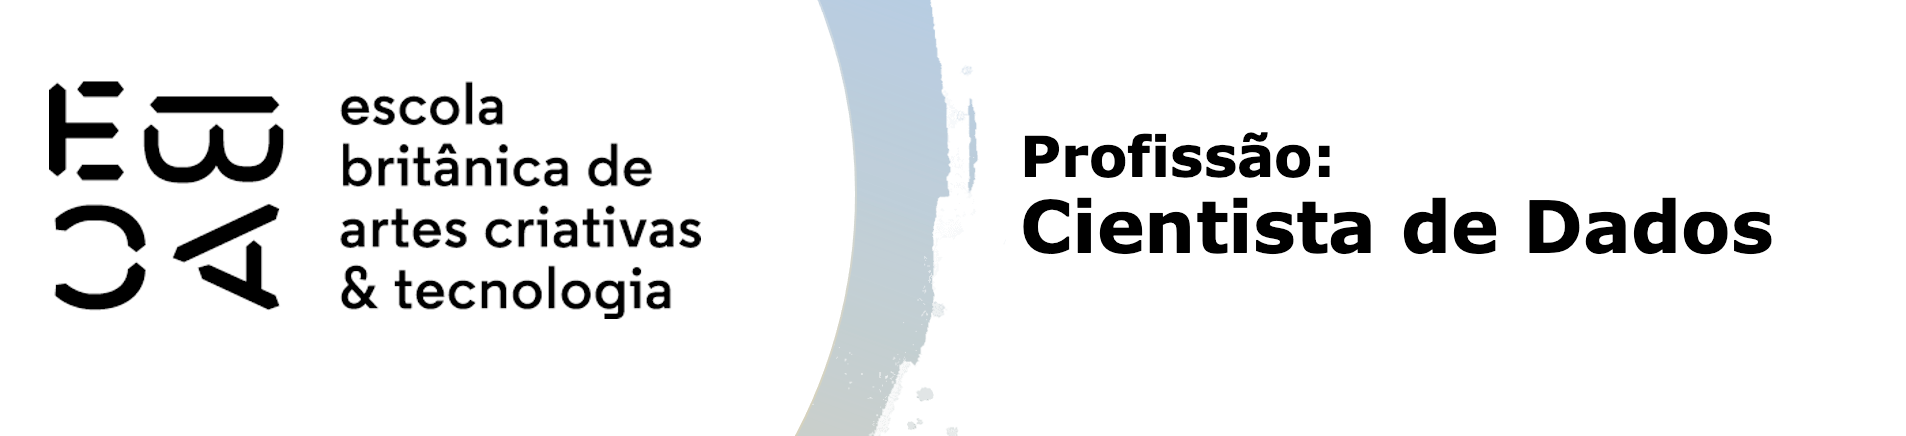

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import zscore
import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
df = pd.read_csv('previsao_de_renda.csv', index_col= 0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


Primeiramente iremos fazer os tratamentos e separar em bases de treino e testes, após isso iremos rodar o modelo com maior valor de *R-quadrado* possível, dadas as variáveis disponíveis.

In [3]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace= True)

C:\Users\samsun\AppData\Local\Temp\ipykernel_13860\3139311991.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace= True)


In [4]:
df.reset_index(names='data', inplace=True)
meses = df['data'].unique()[-3:]


In [5]:
df_test = df[df['data'].isin(meses)].copy()
df_train = df[~df['data'].isin(meses)].copy()

In [6]:
res = smf.ols('np.log(renda) ~ sexo+  posse_de_veiculo+  posse_de_imovel+  idade + tempo_emprego',
              data = df_train).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                 8.925e+04
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:35:20   Log-Likelihood:            -8.0343e+05
No. Observations:              600000   AIC:                         1.607e+06
Df Residuals:                  599994   BIC:                         1.607e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.2669      0.005   1519.797      0.000       8.256       8.278
sexo[T.M]                 0.1308      0.003     47.068      0.000       0.125       0.136
posse_de_veiculo[T.S]     0.0252      0.003      9.546      0.000       0.020       0.030
posse_de_imovel[T.S]      0.1829      0.003     71.384      0.000       0.178       0.188
idade                    -0.0044      0.000    -38.456      0.000      -0.005      -0.004
tempo_emprego             0.1326      0.000    653.969      0.000       0.132       0.133
==============================================================================
Omnibus:                      887.641   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.591
Skew:                          -0.052   Prob(JB):                    1.43e-174
Kurtosis:                       2.854   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

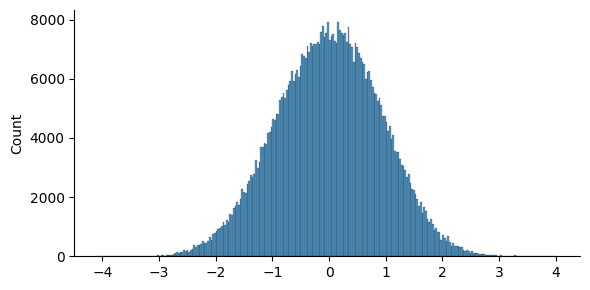

In [7]:
sns.displot(res.resid, height= 3, aspect= 2)

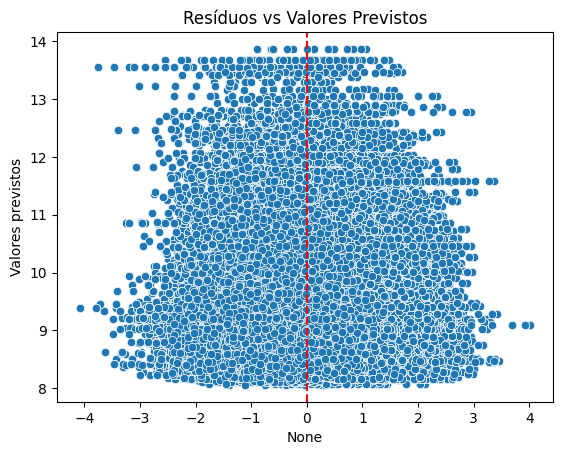

In [8]:
# Primeiramente iremos fazer um gráfico dos resíduos versus os valores preditos
sns.scatterplot(x = res.resid, y= res.predict(), data = df_train,);
plt.axvline(0, color='red', linestyle='--')
plt.ylabel('Valores previstos')
plt.title('Resíduos vs Valores Previstos')
plt.show()

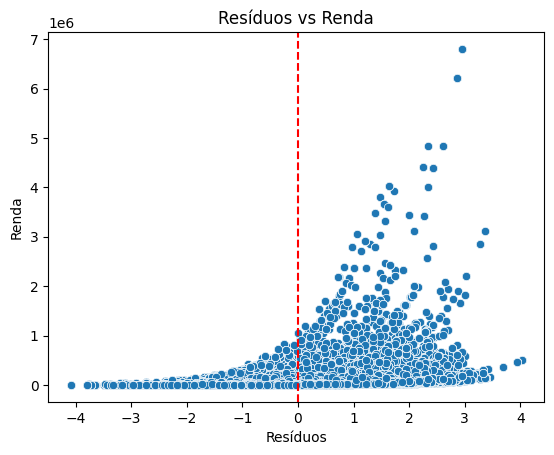

In [9]:
# Agora iremos analisar o resíduo em função de cada variável, começando pela renda
sns.scatterplot(x=res.resid, y='renda', data=df_train,);
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Resíduos')
plt.ylabel('Renda')
plt.title('Resíduos vs Renda')
plt.show()

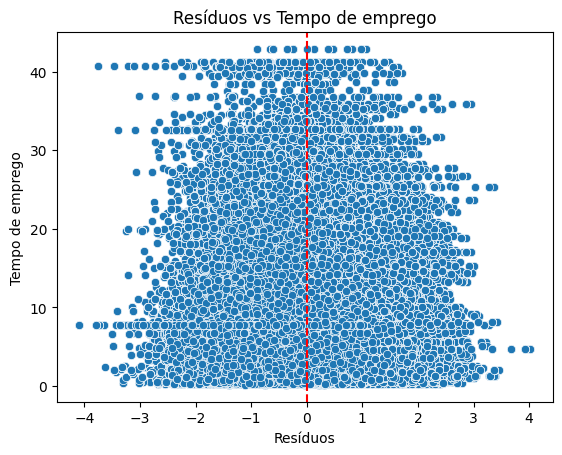

In [10]:
sns.scatterplot(x=res.resid, y='tempo_emprego', data=df_train);
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Resíduos')
plt.ylabel('Tempo de emprego')
plt.title('Resíduos vs Tempo de emprego')
plt.show()

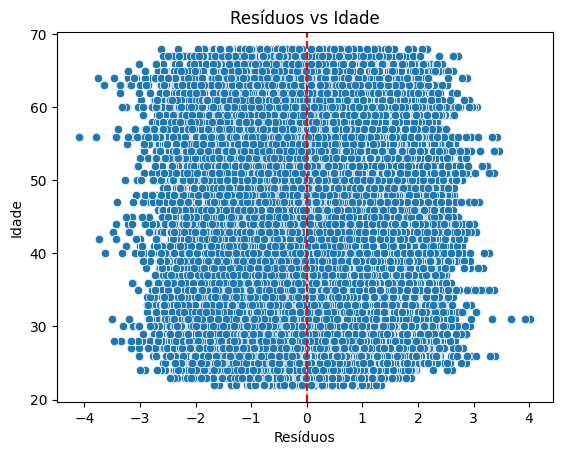

In [11]:
sns.scatterplot(x=res.resid, y='idade', data=df_train);
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Resíduos')
plt.ylabel('Idade')
plt.title('Resíduos vs Idade')
plt.show()

In [12]:
# Agora iremos agrupar a média dos resíduos pelo mês de referência e plotar um gráfico com essa informações
df_train['data'] = pd.to_datetime(df_train['data'])
df_train['mes_ref'] = df_train['data'].dt.to_period('M')
df_train['residuos'] = res.resid
media_residuos_por_mes = df_train.groupby('mes_ref')['residuos'].mean()

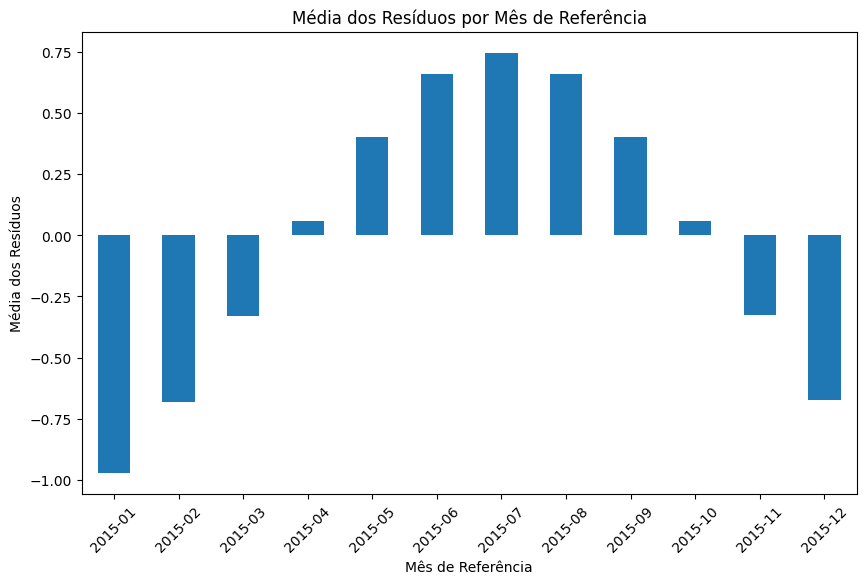

In [13]:
plt.figure(figsize=(10, 6))
media_residuos_por_mes.plot(kind='bar')
plt.title('Média dos Resíduos por Mês de Referência')
plt.xlabel('Mês de Referência')
plt.ylabel('Média dos Resíduos')
plt.xticks(rotation=45)
plt.show()

Podemos ver pelo gráfico acima que os resíduos possuem distribuição aproximadamente normal em torno de quase todas as variáveis, sendo a renda a única variável que precisa de ajustes, podemos afirmar isso, pois em todos eles (exceto pela renda), os pontos se distribuem de maneira quase aleatória em torno do zero.

Já se tratando da média dos resíduos em função do mês, podemos afirmar que essa média se torna maior (mais positiva) no meio do ano, e cai durante o início e o fim dele, se isso é uma tendência que ocorre em todos os anos ou não, precisamos de mais informação para afirmar.

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [14]:
df_train['z_score'] = zscore(df_train['renda'])
outliers = df_train[df_train['z_score'].abs() > 3]

In [15]:
infl = res.get_influence()
studentized_residuals = infl.resid_studentized_internal

In [16]:
# Adicionando os resíduos studentizados ao DataFrame
df_train['studentized_residuals'] = studentized_residuals

# Visualizando os outliers baseados nos resíduos studentizados
outliers_st = df_train[np.abs(df_train['studentized_residuals']) > 3]

Aqui assumimos que os outliers são aqueles pontos que possuem uma distancia maior que 3 desvios padrão da média, isso também se aplica para os *studentized residuals*, abaixo iremos plotar todos os pontos, sendo que a linha vermelha marca o limite para os possíveis outliers, quaisquer ponto acima ou abaixo dessas linhas serão considerados como outliers.

No outro gráfico abaixo iremos plotar somente os outliers.

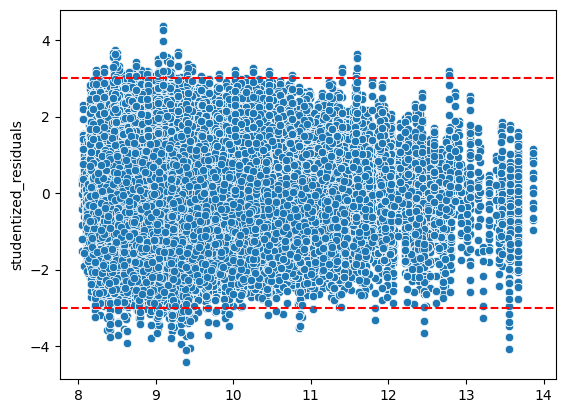

In [17]:
sns.scatterplot(x=res.predict(), y=df_train['studentized_residuals'])
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')

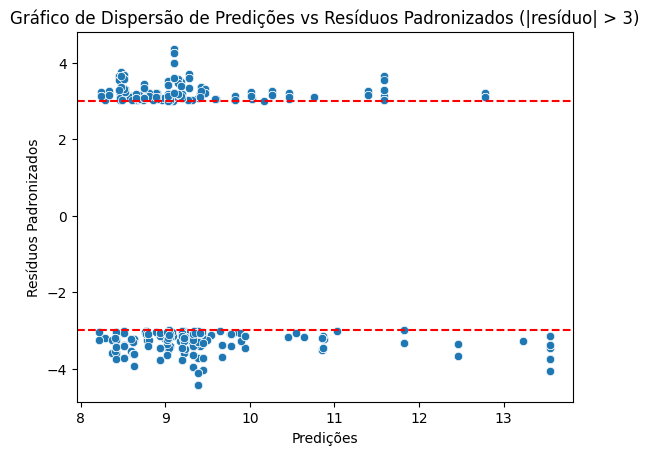

In [18]:
filtro = df_train['studentized_residuals'].abs() > 3
x_filtrado = res.predict()[filtro]
y_filtrado = df_train['studentized_residuals'][filtro]

sns.scatterplot(x=x_filtrado, y=y_filtrado)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.xlabel('Predições')
plt.ylabel('Resíduos Padronizados')
plt.title('Gráfico de Dispersão de Predições vs Resíduos Padronizados (|resíduo| > 3)')
plt.show()

In [20]:
df_train.columns

Index(['data', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mes_ref', 'residuos', 'z_score', 'studentized_residuals'],
      dtype='object')

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

Aqui iremos primeiramente plotar a matriz de correlação de Spearman, tomando cuidado para filtrar as variáveis categóricas, abaixo iremos criar as funções para plotar a correlação de Cramer e por fim iremos calcular os valores VIF, sendo que, mais uma vez iremos tomar o devido cuidado de se criar variáveis dummy quando necessário.

In [21]:
colunas_drop = ['data', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel','tipo_renda', 'educacao','estado_civil', 'tipo_residencia','mes_ref']
df_train.drop(columns= colunas_drop).corr(method='spearman')

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,residuos,z_score,studentized_residuals
qtd_filhos,1.000000,-0.415384,-0.090583,0.828570,-0.020244,0.005549,-0.020244,0.005549
idade,-0.415384,1.000000,0.301418,-0.350081,0.113378,0.004309,0.113378,0.004309
tempo_emprego,-0.090583,0.301418,1.000000,-0.058691,0.531836,-0.005868,0.531836,-0.005868
qt_pessoas_residencia,0.828570,-0.350081,-0.058691,1.000000,-0.007401,0.001732,-0.007401,0.001732
renda,-0.020244,0.113378,0.531836,-0.007401,1.000000,0.786624,1.000000,0.786623
residuos,0.005549,0.004309,-0.005868,0.001732,0.786624,1.000000,0.786624,1.000000
z_score,-0.020244,0.113378,0.531836,-0.007401,1.000000,0.786624,1.000000,0.786623
studentized_residuals,0.005549,0.004309,-0.005868,0.001732,0.786623,1.000000,0.786623,1.000000


In [22]:
def cramers_corrected_stat(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
        return result

In [23]:
def cram(x, y, max_cat=5):
    if (np.dtype(x) in {np.dtype('float64'), np.dtype('int64')}) \
        and (len(np.unique(x)) > max_cat):
            x_ = pd.qcut(x, max_cat, duplicates= 'drop')
#             print('#########')
    else: x_ = x
    if (np.dtype(y) in {np.dtype('float64'), np.dtype('int64')}) \
        and (len(np.unique(y)) > max_cat):
            y_ = pd.qcut(y, max_cat, duplicates= 'drop')
    else: y_ = y
    return cramers_corrected_stat(x_ ,y_)

In [40]:
df_train.dtypes

data                     datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                 object
posse_de_imovel                  object
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
mes_ref                       period[M]
residuos                        float64
z_score                         float64
studentized_residuals           float64
dtype: object

In [24]:
colunas = ['sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda','residuos', 'z_score',
       'studentized_residuals']

In [25]:
# Construir uma matriz vazia para acomodar as associações
matriz_cramer = pd.DataFrame(np.zeros((len(colunas),len(colunas))), 
             columns=colunas, 
             index=colunas)

# Calcular as associações
for var1 in colunas:
    for var2 in colunas:
        matriz_cramer.loc[var1, var2] = cram(df_train[var1], df_train[var2], 5)
        
matriz_cramer

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,residuos,z_score,studentized_residuals
sexo,1.000000,0.367391,0.055238,0.190153,0.021655,0.170204,0.095631,0.212354,0.157900,0.139710,0.068325,0.004795,0.068325,0.004795
posse_de_veiculo,0.367391,1.000000,0.024697,0.153018,0.099485,0.168568,0.051366,0.179330,0.123384,0.131668,0.025193,0.002369,0.025193,0.002369
posse_de_imovel,0.055238,0.024697,1.000000,0.098883,0.056585,0.052602,0.211402,0.134602,0.078671,0.011733,0.066282,0.004206,0.066282,0.004206
tipo_renda,0.190153,0.153018,0.098883,1.000000,0.093570,0.106913,0.061139,0.369565,0.366814,0.176776,0.080405,0.051993,0.080405,0.051993
educacao,0.021655,0.099485,0.056585,0.093570,1.000000,0.038727,0.050911,0.115087,0.059312,0.059266,0.024451,0.024736,0.024451,0.024736
estado_civil,0.170204,0.168568,0.052602,0.106913,0.038727,1.000000,0.045531,0.138159,0.082014,0.215687,0.018225,0.007814,0.018225,0.007814
tipo_residencia,0.095631,0.051366,0.211402,0.061139,0.050911,0.045531,1.000000,0.111602,0.065441,0.049995,0.025462,0.007887,0.025462,0.007887
idade,0.212354,0.179330,0.134602,0.369565,0.115087,0.138159,0.111602,1.000000,0.291413,0.316208,0.089432,0.032123,0.089432,0.032123
tempo_emprego,0.157900,0.123384,0.078671,0.366814,0.059312,0.082014,0.065441,0.291413,1.000000,0.127347,0.294221,0.029509,0.294221,0.029509
qt_pessoas_residencia,0.139710,0.131668,0.011733,0.176776,0.059266,0.215687,0.049995,0.316208,0.127347,1.000000,0.026339,0.008289,0.026339,0.008289


In [39]:
df_dum = (pd.get_dummies(df_train[colunas], drop_first= True)
          .astype(int))

In [27]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,29.80,idade
1,6.43,tempo_emprego
2,11.09,qt_pessoas_residencia
3,-0.00,renda
4,8.47,residuos
5,51.76,z_score
6,8.79,studentized_residuals
7,1.80,sexo_M
8,1.97,posse_de_veiculo_S
9,3.26,posse_de_imovel_S


Analisando os valores de VIF, vemos que os maiores valores deles , as variáveis 'residuos', 'z_score' e 'studentized_residuals' são esperadas que possuam valores altos, pois estas foram criadas em função de outras variáveis, logo, são explicadas por elas. Se descartarmos estas, vemos que as variáveis que têm que ser ajustadas serão: 'idade', 'educacao_Médio', 'educacao_Superior completo' e 'tipo_residencia_Casa'. Temos também que 'educacao_Médio' e 'educacao_Superior completo' são dummies da variável original 'educacao', logo, as variáveis tratadas serão 'educacao', 'idade' e 'tipo_residencia'.

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [28]:
medias_educ = df_test.groupby('educacao')['renda'].mean()
df_test['educ'] = df_test['renda'] - df_test['educacao'].map(medias_educ)

medias_idade = df_test.groupby('idade')['renda'].mean()
df_test['idade_ortog'] = df_test['renda'] - df_test['idade'].map(medias_idade)

medias_resid = df_test.groupby('tipo_residencia')['renda'].mean()
df_test['resid'] = df_test['renda'] - df_test['tipo_residencia'].map(medias_resid)


In [29]:
res_ortog = smf.ols('np.log(renda) ~ sexo +  posse_de_veiculo+  posse_de_imovel+  idade_ortog + tempo_emprego + educ + resid',
              data = df_test).fit()
res_ortog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 2.842e+04
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:40:49   Log-Likelihood:            -1.6263e+05
No. Observations:              150000   AIC:                         3.253e+05
Df Residuals:                  149992   BIC:                         3.254e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.0888      0.005   1468.345      0.000       7.079       7.098
sexo[T.M]                 0.1432      0.004     33.490      0.000       0.135       0.152
posse_de_veiculo[T.S]     0.0345      0.004      8.450      0.000       0.027       0.043
posse_de_imovel[T.S]      0.1658      0.004     41.675      0.000       0.158       0.174
idade_ortog             2.69e-06   4.62e-07      5.817      0.000    1.78e-06     3.6e-06
tempo_emprego             0.1084      0.000    290.501      0.000       0.108       0.109
educ                  -2.052e-05   1.88e-06    -10.907      0.000   -2.42e-05   -1.68e-05
resid                  2.849e-05    1.9e-06     15.031      0.000    2.48e-05    3.22e-05
==============================================================================
Omnibus:                     6096.264   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11992.934
Skew:                          -0.303   Prob(JB):                         0.00
Kurtosis:                       4.246   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

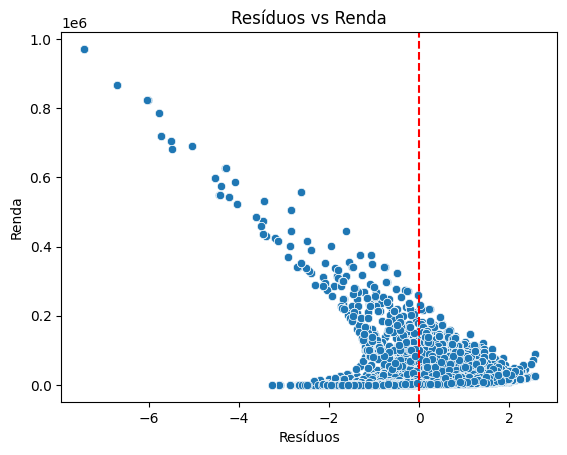

In [30]:
sns.scatterplot(x=res_ortog.resid, y='renda', data=df_test,);
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Resíduos')
plt.ylabel('Renda')
plt.title('Resíduos vs Renda')
plt.show()

In [52]:
colunas_test = ['sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda',
       'idade_ortog',  'educ' , 'resid']

In [53]:
df_dum_test = (pd.get_dummies(df_test[colunas_test], drop_first= True)
          .astype(int))

In [54]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum_test.shape[1])]
vars_vif["Feature"] = df_dum_test.columns

vars_vif.round(2)

,VIF Factor,Feature
0,29.80,idade
1,6.43,tempo_emprego
2,11.09,qt_pessoas_residencia
3,-0.00,renda
4,8.47,idade_ortog
5,51.76,educ
6,8.79,resid
7,1.80,sexo_M
8,1.97,posse_de_veiculo_S
9,3.26,posse_de_imovel_S
